<a href="https://colab.research.google.com/github/yuzukiiii16/generative_ai/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 說明Cross Entropy、KL divergence

Cross Entropy：
	衡量模型的預測機率分布 Q 與真實標籤分布 P 之間的匹配程度，當預測值與實際值相差越大(模型對真實標籤的預測機率低)，也就是代表資訊量愈大，Cross Entropy就會越大；當預測機率越接近真實機率時，Cross Entropy就會越小。


KL divergence：


* 衡量P(資料真實機率)和Q(模型預測的機率)的整體差異，數值越小代表兩者越相近。
* 與Cross Entropy不同的地方是，KL divergence不只關注正確類別的機率，還會考慮其他類別的機率是否符合真實機率分布，因為它希望模型輸出的分布 Q(模型預測的機率) 能夠完整匹配 P(資料真實機率)。
* 是Cross Entropy減掉真實世界的entropy。但真實世界的entropy只有在P(資料真實機率)給定時才是固定的。
* 和Cross Entropy差異一樣，但差異的級距上不一樣，用KL divergence可以讓差異的級距更容易看出。
* 通常用來讓模型學習一個較為平滑的目標分布，而不是單一的正確類別標籤。


什麼情境下會用哪個?<br>

Cross Entropy 適合用於 <font color=blue>one-hot encoding</font>，因為在 one-hot encoding的情況下，P(資料真實機率)只有一個類別的機率為 1，其餘為 0，而在這種情況下，Cross <font color=blue>Entropy的計算只會關心 Ground Truth 類別的機率，其他類別的項目不影響Cross Entropy的計算</font>，因為他們乘上P=0(資料真實機率)後都會變成 0。

當我們希望模型學習一個機率分布，而非單一類別的標籤，或是讓小模型去學習一個更強的大模型的知識時會使用KL divergence，因為Cross Entropy主要考慮單一類別標籤，而<font color=blue>KL divergence則會考慮完整分布，也就是說它不只在乎正確類別，還會懲罰不符合真實分佈的預測。KL divergence會要求模型輸出的Q(模型預測的機率)也要匹配整體機率分布，而不只是讓正確類別的機率變大</font>。當 P(資料真實機率) 是 one-hot，KL divergence的行為與Cross Entropy接近，因為只需要關心一個類別的機率；但當 P(資料真實機率) 是一個 soft label，KL divergence會讓模型去匹配整體機率分布，而不是去最大化某個類別的機率，因此適合用在蒸餾，因為在知識蒸餾中，學生模型學習的不只是最可能的類別，而是教師模型給出的整體機率分布。例如，某個影像可能 70% 屬於「貓」，但也有 20% 是「狗」，10% 是「狐狸」，這些資訊在 one-hot 標籤中無法表達，但在 Soft Labels中會保留， KL divergence非常適合衡量這種機率分布的匹配度。


# 程式實驗

# 分類問題中使用cross entropy是否比較好?

使用mse作為loss function(用第二周作業改的，只有改loss function)，程式碼：https://colab.research.google.com/drive/1YhLrnGmj6wC7hh2P6BCFMQrp0PArAXT9?usp=sharing
<br>結果：


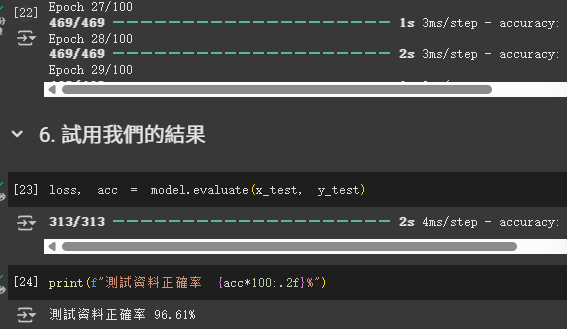

使用cross entropy作為loss function，程式碼我用第二周作業的：https://colab.research.google.com/drive/187QP8ooVCmiwZHomanBE-XZHgWfYfBjo?usp=sharing
<br>結果：


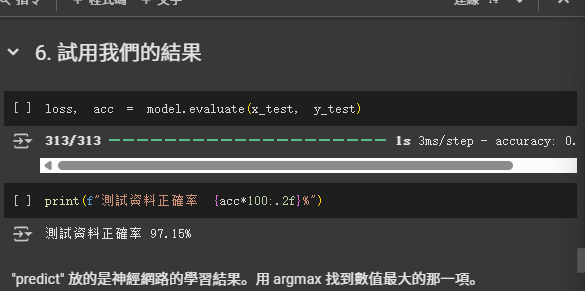

<h3>發現：</h3><br>
使用cross entropy的時候，資料正確率比較高，代表使用cross entropy更適合用在分類問題

# 比較在蒸餾問題使用cross entropy和KL divergence

我先上網找範例，用MNIST訓練一個老師模型，再訓練學生模型，但後來發現因為是以MNIST作為data的關係(MNIST是一個較簡單的資料集，所以正確率都很高)，所以其實用Cross Entropy、KL divergence沒有很明顯的差異，所以我再試了別種資料集(CIFAR-10)，但一直跑不出來，還有花太多時間，應該跑了1-2天都沒有出來，故沒有實際做出比較，原本用MNIST訓練的程式碼因為比較不出來所以就先刪掉了。